# Régression linéaire appliquée

Adapté de [Towards Data Science](https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0)

***

In [42]:
# In this cell we import the modules we want to use later on.
import pandas     # To work with tables
import numpy      # For maths
import seaborn    # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt

cufflinks.go_offline()

## Import des données

> L'ensemble de données publicitaires enregistre les revenus de ventes générés par rapport aux coûts de publicité sur plusieurs canaux tels que la radio, la télévision et les journaux.

In [43]:
advert = pandas.read_csv('../data/advertising/advertising.csv', index_col=0)
advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Pivot des données 

In [44]:
# On crée une dataframe avec les colonnes sales et spend
# et on stocke dans des lignes les infos TV / radio
# grâce à une nouvelle colonne "channel"
pivoted = pandas.melt(advert.reset_index(), id_vars=['index', 'sales'])

# On renomme
pivoted = pivoted.rename(columns={'index':'transaction', 'value':'spend', 'variable':'channel'})

pivoted.head()

,transaction,sales,channel,spend
0,1,22.1,TV,230.1
1,2,10.4,TV,44.5
2,3,9.3,TV,17.2
3,4,18.5,TV,151.5
4,5,12.9,TV,180.8


## Quelques graphs

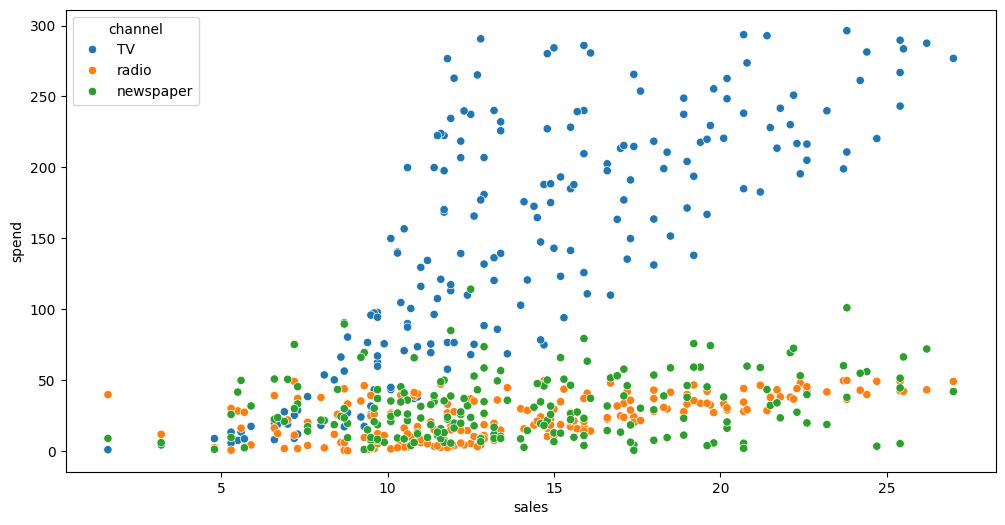

In [45]:
plt.figure(figsize=(12, 6))
ax = seaborn.scatterplot(data=pivoted, x='sales', y='spend', hue='channel')

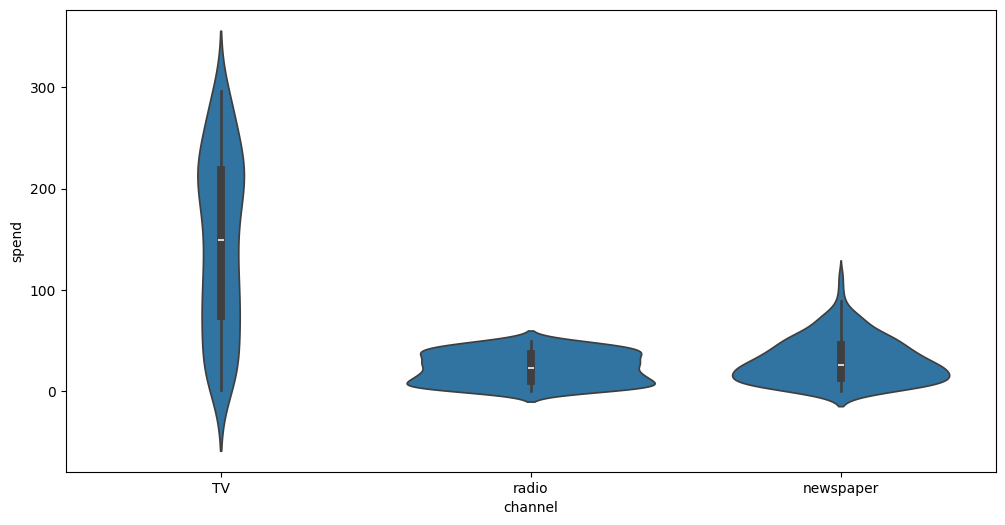

In [46]:
plt.figure(figsize=(12, 6))
ax = seaborn.violinplot(data=pivoted, y='spend', x='channel')

## Réprésentations interactives avec `cufflinks`
[documentation](https://plot.ly/ipython-notebooks/cufflinks/).

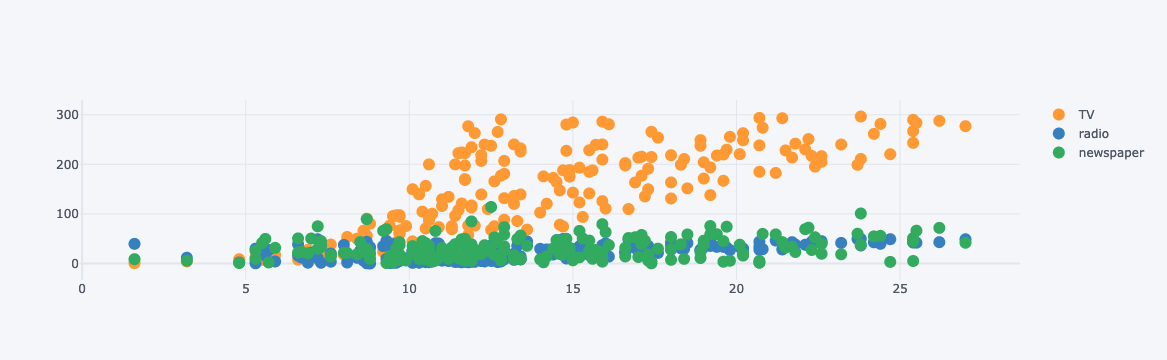

In [47]:
advert.iplot(kind='scatter', x='sales', mode='markers')

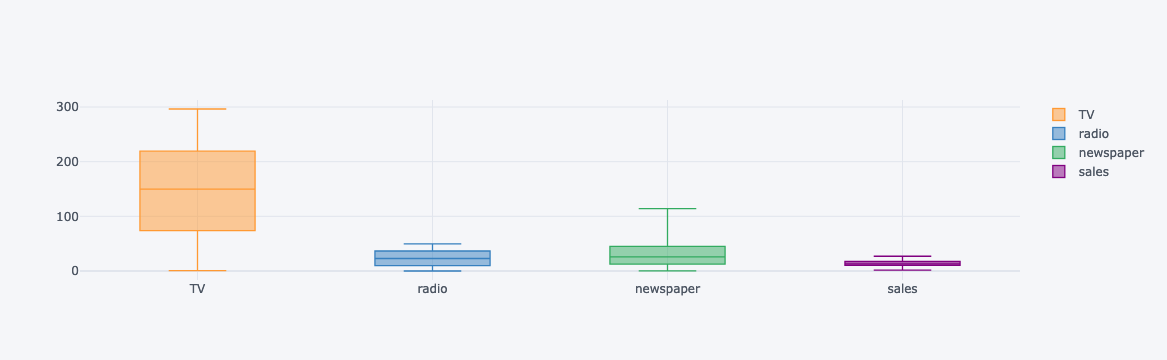

In [48]:
advert.iplot(kind='box')

## Modélisation avec `scikit-learn`

In [49]:
from sklearn.linear_model import LinearRegression

# Création des vecteurs X et y
predictors = ['TV', 'radio']
X = advert[predictors]
y = advert['sales']

# Fit fu modèle
lm = LinearRegression()
model_TV_Radio = lm.fit(X, y)

# Valeurs des coefficients
print(f'alpha = {model_TV_Radio.intercept_}')
print(f'betas = {model_TV_Radio.coef_}')

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


## Prédiction individuelle

In [50]:
# Prédiction
new_X = [[300, 200]]
print(model_TV_Radio.predict(new_X))

[54.24638977]


/Users/selim/repos/spe1/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## Validation du modèle avec `sklearn`

#### Train & Test

In [68]:
from sklearn.model_selection import train_test_split

# On divise les données en 80% vs 20%
train, test = train_test_split(advert, test_size=0.2)

#### Entraînement

In [69]:
# On bâtit le modèle
predictors = ['TV', 'radio', 'newspaper']
X = train[predictors]
y = train['sales']
lm = LinearRegression()
model_2 = lm.fit(X, y)

#### Prédictions (sur le Test)

In [70]:
# On prédit
test['predictions'] = model_2.predict(test[predictors])

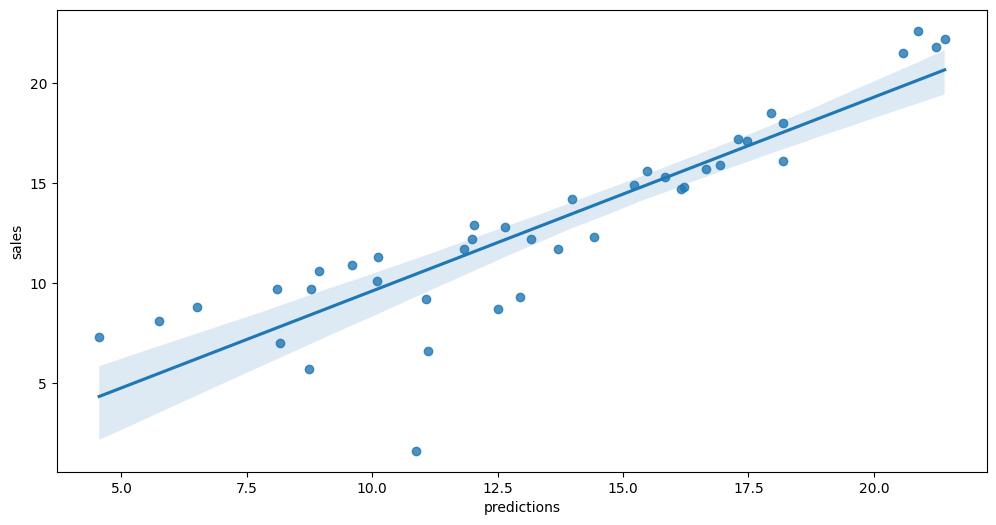

In [71]:
plt.figure(figsize=(12, 6))
ax = seaborn.regplot(y='sales', x='predictions', data=test)

#### Calcul du R2

In [54]:
r_squared = model_2.score(test[predictors], test["sales"])
print(f'R²: {r_squared:.2f}')

R²: 0.80


# Exercice


***

Les données contiennent :

- Budget de promotion TV (en millions)
- Budget de promotion sur les réseaux sociaux (en millions)
- Budget de promotion radio (en millions)
- Influenceur : Si la promotion collabore avec un influenceur Méga, Macro, Nano, Micro
- Ventes (en millions)


***


### 1. Chargement et préparation des données
- **Comment charger un ensemble de données à partir d'un fichier CSV en utilisant pandas ?**
- **Comment gérer facilement les valeurs manquantes (s'il y en a) ?**
- **Comment convertir les variables catégorielles en variables indicatrices et pourquoi supprimer la première catégorie est important ?**
  - Utilisez `pd.get_dummies()` avec l'argument `drop_first=True`.
  - [Documentation pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

### 2. Séparation des données
- **Comment séparer les données en un ensemble d'entraînement et un ensemble de test ?**
  - Utilisez `train_test_split` de scikit-learn.
  - [Documentation train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### 3. Normalisation des données
- **Pourquoi et comment standardiser les caractéristiques des données ?**
  - Utilisez `StandardScaler` pour normaliser les données.
  - [Documentation StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

### 4. Création et entraînement du modèle
- **Comment créer et entraîner un modèle de régression linéaire ?**
  - Utilisez `LinearRegression` de scikit-learn.
  - [Documentation LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### 5. Évaluation du modèle
- **Comment évaluer les performances d'un modèle de régression linéaire sur l'ensemble de test ?**
  - Calculez le Mean Squared Error (MSE) et le coefficient de détermination (R²) en utilisant `mean_squared_error` et `r2_score`.
  - [Documentation mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
  - [Documentation r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

### 6. Validation croisée
- **Comment utiliser la validation croisée pour évaluer la robustesse du modèle ?**
  - Utilisez `cross_val_score` avec le modèle et les données.
  - [Documentation cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

### 7. Optimisation des hyperparamètres
- **Comment optimiser les hyperparamètres d'un modèle Ridge ?**
  - Utilisez `GridSearchCV` avec `Ridge` pour trouver le meilleur paramètre `alpha`.
  - [Documentation GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  - [Documentation Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### 8. Évaluation du modèle optimisé
- **Comment prédire et évaluer le modèle Ridge optimisé ?**
  - Répétez l'évaluation en utilisant `mean_squared_error` et `r2_score` pour le modèle optimisé.

In [67]:
import pandas as pd

df = pd.read_csv("../data/advertising_with_dummies/Dummy Data HSS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB
